In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM, COUNT
import copy
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

acpc_workspace='/group_workspaces/jasmin2/acpc'
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict
import matplotlib.pyplot as plt


In [10]:
# COSMO_KIT  MesoNH_Toulouse  RAMS_CSU  UM_LEEDS  WRF_NASA  WRF_OXF  WRF_PNNL
models = []
models.append('RAMS_CSU')

dx = '500m'
dt = '5m'


In [22]:
terms2 = ['(a) B$_{TH}$', '(b) B$_{QV}$', '(c) B$_{CL}$', '(d) VPPG', '(e) HADV', '(f) VADV']
plt.rcParams.update({'font.size': 22})
ylims = [0,14]
xlims = [3,40]

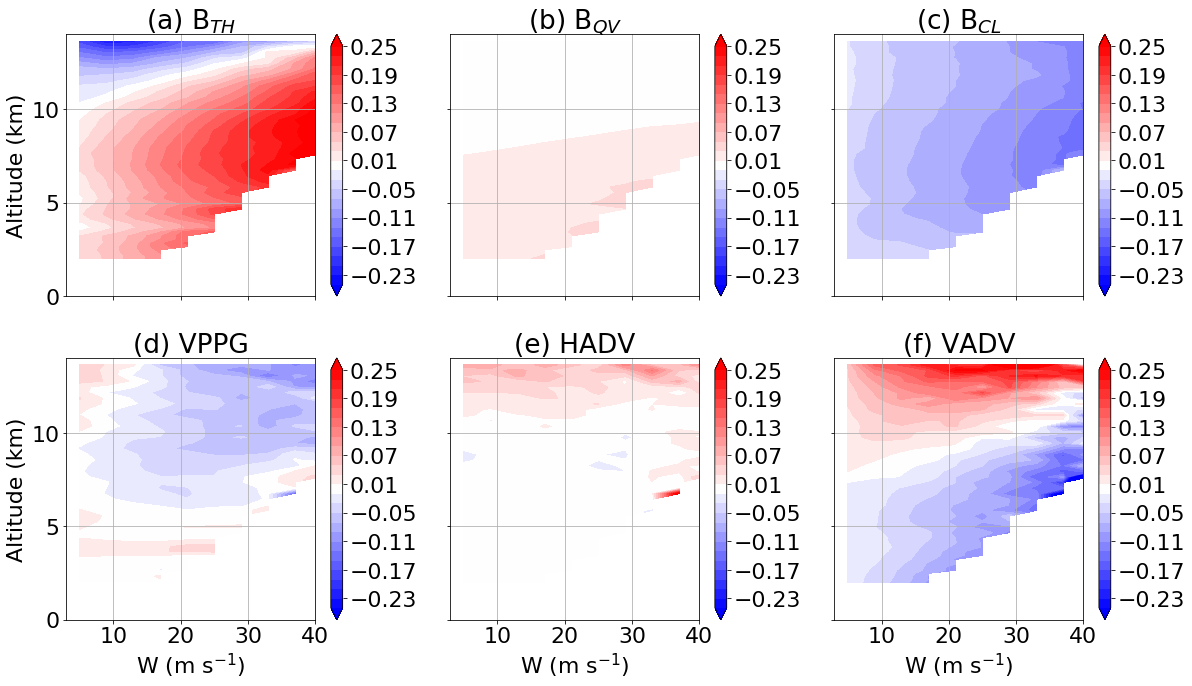

In [28]:
w_mid_c = OrderedDict()
alt_c = OrderedDict()
t_avg_c = OrderedDict()
w_cnt_c = OrderedDict()
w_avg_c = OrderedDict()
w_med_c = OrderedDict()
t_med_c = OrderedDict()
t_75_c = OrderedDict()

w_mid_p = OrderedDict()
alt_p = OrderedDict()
t_avg_p = OrderedDict()
w_cnt_p = OrderedDict()
w_avg_p = OrderedDict()
w_med_p = OrderedDict()
t_med_p = OrderedDict()
t_75_p = OrderedDict()

for model in models:
    w_mid_c[model] = OrderedDict()
    alt_c[model] = OrderedDict()
    t_avg_c[model] = OrderedDict()
    w_cnt_c[model] = OrderedDict()
    w_avg_c[model] = OrderedDict()
    w_med_c[model] = OrderedDict()
    t_med_c[model] = OrderedDict()
    t_75_c[model] = OrderedDict()

    w_mid_p[model] = OrderedDict()
    alt_p[model] = OrderedDict()
    t_avg_p[model] = OrderedDict()
    w_cnt_p[model] = OrderedDict()
    w_avg_p[model] = OrderedDict()
    w_med_p[model] = OrderedDict()
    t_med_p[model] = OrderedDict()
    t_75_p[model] = OrderedDict()
    
#### For Revisions

lvls = np.arange(-0.25,0.251,0.02)
fig,ax = plt.subplots(2,4,figsize=[22,10],sharex=True,sharey=True)
plt.rcParams.update({'font.size': 22 })
c0 = 0; c1 = 0;
xtix = [10,20,30,40]

#t_lvls = np.arange(-0.25,0.25001,0.005); t2_lvls = t_lvls/6
#tick_levels = np.arange(-0.25,0.25001,0.05); tick_levels2 = np.arange(-0.04,0.04001,0.02); 
#hline_color = 'gray'
#hline_size = 2

#fs2 = 19
#fsc = 17
#ylims = [2,14]
#xlims = [3,50]
#xticks = [3,10,20,30,40,50]
#yticks = [3,6,9,12]
#bgc = "lightgray"
#for ii in [0,1,3,4,5,6]:

#for ii in [7]:
te = 0
for ii in [0, 1, 6, 5, 3, 4]:
    if ii == 0:
        tf = 'Term_TH_v2'; 
    elif ii == 1:
        tf = 'Term_QV_v2';
    elif ii == 3:
        tf = 'Term_HADV'; 
    elif ii == 4:
        tf = 'Term_VADV'; 
    elif ii == 5:
        tf = 'Term_VPGF_v2'; 
    elif ii == 6:
        tf = 'Term_TC'; 
    elif ii == 7:
        tf = 'Term_B_VPPG'; 
    
    import pickle
    thresh = 0.0001
    dx = '500m'
    dt = '5m'
       
    for model in ['RAMS_CSU']:
        
        if model == 'WRF_PNNL' or model == 'RAMS_CSU' or model == 'UM_LEEDS':
            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
            [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))

            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
            [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))
        else:
            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/POL/'+dx+'/'+dt+'/'
            [w_mid_p[model][tf],alt_p[model][tf],t_avg_p[model][tf],w_cnt_p[model][tf],w_avg_p[model][tf],w_med_p[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))

            savedir = '/group_workspaces/jasmin2/acpc/users/pmarin/Processing_W_Terms/Save_Data/'+model+'/CLN/'+dx+'/'+dt+'/'
            [w_mid_c[model][tf],alt_c[model][tf],t_avg_c[model][tf],w_cnt_c[model][tf],w_avg_c[model][tf],w_med_c[model][tf],t_med_p[model][tf],t_75_p[model][tf]] = pickle.load(open(os.path.join(savedir,'CFAD_'+tf+'_'+str(thresh)+'_Apr196km.p'),"rb"))

        t_plot_c = t_avg_c
        t_plot_p = t_avg_p
        addname = 'avg'
        
        # CLEAN Simulation Plot
        a = ax[c0,c1].contourf(w_mid_c[model][tf],alt_c[model][tf]/1000,np.transpose(t_plot_c[model][tf]),levels=lvls,cmap=plt.cm.bwr,extend='both')
        plt.colorbar(a,ax=ax[c0,c1])
        ax[c0,c1].set_xticks(xtix)
        ax[c0,c1].set_title(terms2[te])
        ax[c0,c1].grid()
       
    te = te + 1
    if c1 == 0:
        ax[c0,c1].set_ylabel('Altitude (km)')    
    if c0 == 1:
        ax[c0,c1].set_xlabel('W (m s$^{-1}$)')
    c1 = c1 + 1
    if c1 == 3:
        c1 = 0; c0 = 1
        
        
        
ax[c0,c1].set_xlim(xlims)
ax[c0,c1].set_ylim(ylims)
plt.tight_layout()        
ax[0,3].set_visible(False)
ax[1,3].set_visible(False)
